# 四元数(quaternion)

## 一、定义

$Q = \{w + x i + yj + zk)|w, x, y, z \in \mathscr{R}\} $

$ s.t.， i * i = j * j = k * k = ijk = -1 $




## 二、四元数和三维空间旋转的关系
### 2.1 四元数与旋转向量的关系
常用模长为1($w ^ 2 + x ^ 2 + y ^ 2 + z ^ 2 = 1$)的**单位四元数表示$\mathscr{R}^3$旋转**。对于单位四元数而言 $q^{-1} = q^*$。
我们通常用$[\theta, \vec{v}]$表示一个旋转向量，其中单位向量$\vec{v}$表示转轴，$\theta$表示旋转角度。单位四元数与和旋转向量的关系如下所示。

$$q = (cos(\theta / 2), sin(\theta / 2)\vec{v})$$


要对$(x, y, z) \in \mathscr{R}^3$中的点进行旋转，首先将坐标点表示成四元数的形式

$$q_{0} = (0, x, y, z)$$

旋转后的坐标即$q_{new}$的虚部坐标。

$$q_{new} = q * q_{0} * q ^{*}$$

### 2.2 四元数与旋转矩阵的关系
2.1介绍了四元数和旋转向量$[v, \theta]$的关系，下面介绍四元数与旋转矩阵的关系。旋转矩阵和旋转向量之间具有李群和李代数的关系。

我们称矩阵集合$\{R|RR^T = I, det(R)> 1\}$关于矩阵乘法构成一个特殊正交群SO。在三维空间中即三维特殊正交群SO(3)，SO(3)是一个李群(可以认为是一个连续光滑的群)。每个李群都有对应的李代数，李代数描述了李群的局部性质。其定义为：李代数由一个集合V, 一个数域F 和一个二元运算[,] 组成。SO(3)对应的李代数so(3)即旋转向量。

SO(3)和so(3)之间的转换公式如下所示

$$R = cos(\theta) I + (1 - cos(\theta))\vec{v}\vec{v}^T + {\vec{v}}^{\^{}}sin(\theta)$$

其中指数映射表示将so(3)映射到SO(3)，也被称为罗德里格斯公式。根据2.1节中四元数与旋转向量的关系，以及罗德里格斯公式，即可得到四元数与三维空间旋转矩阵的映射关系。
对数映射即李群SO(3)到李代数so(3)的映射:

$$arccos(\frac{trace(R) - 1}{2}) = \theta$$

$$R\vec{v} = \vec{v}$$


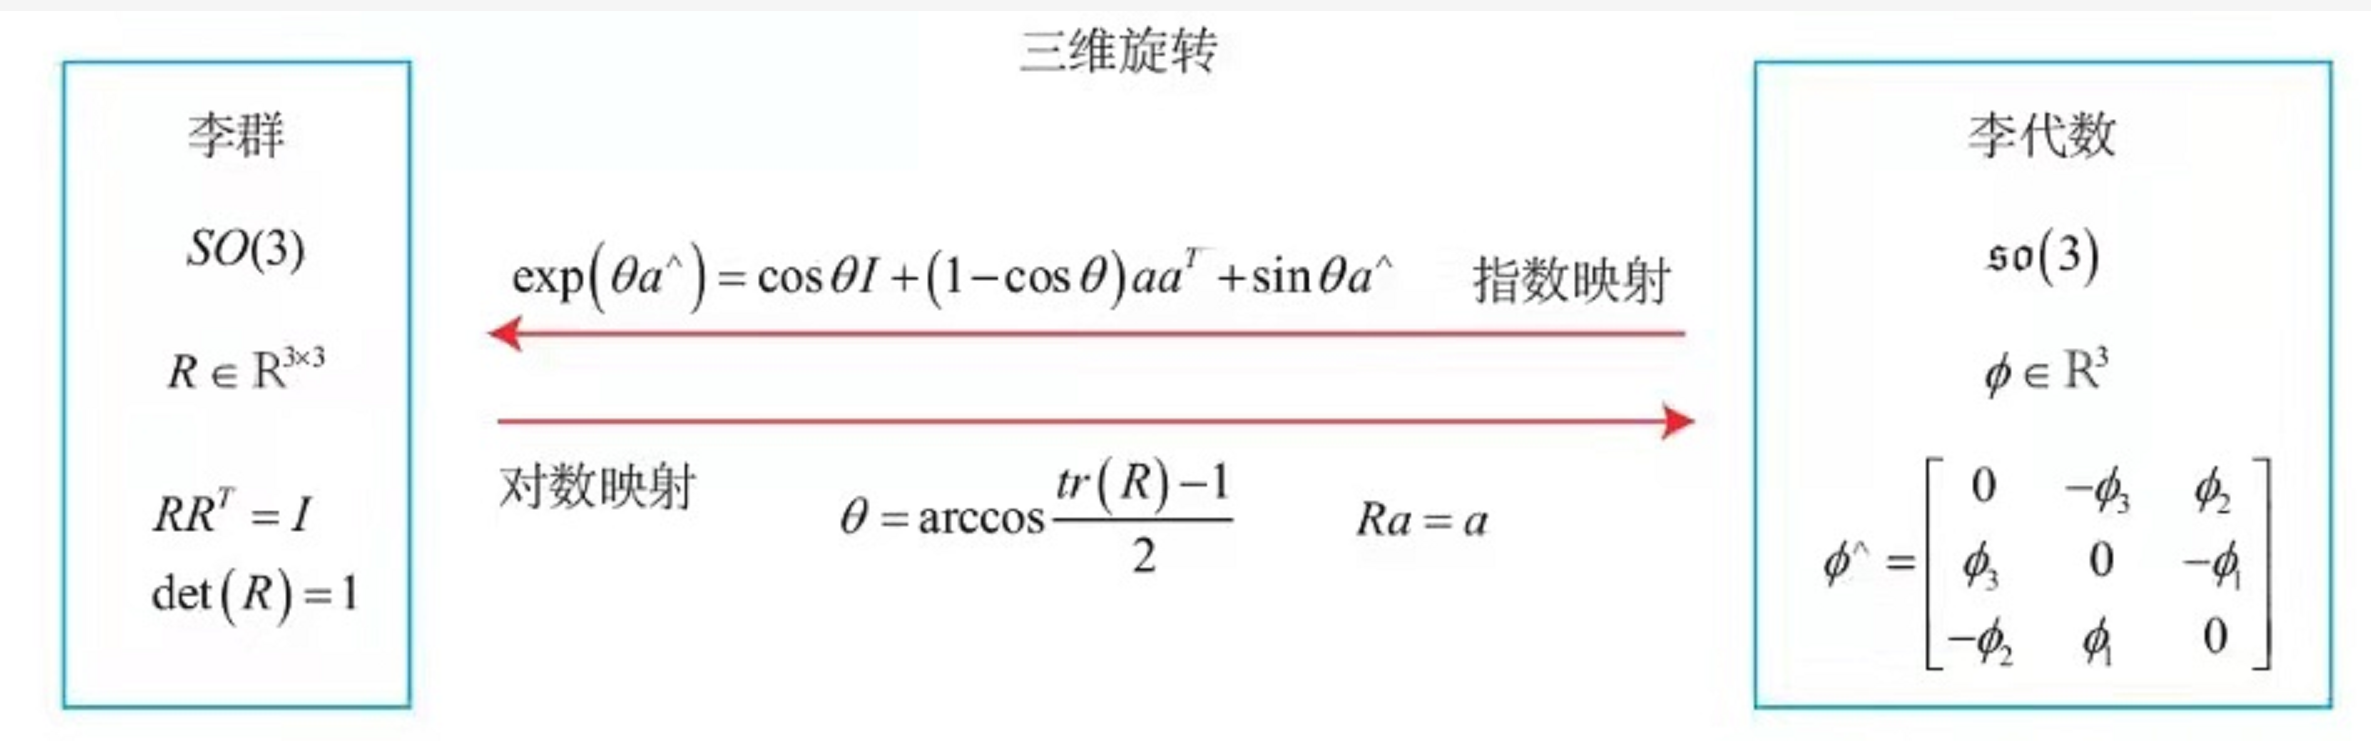

In [10]:
from PIL import Image
display(Image.open("../resources/Lie_group.png"))

## 三、四元数的插值

对于一般的向量，最常用的插值是线性插值，即用两个向量的凸组合表示新的向量进行插值：

$$\vec{r} = \theta \vec{p} + (1 - \theta) \vec{q}, \theta \in [0, 1]$$

然而单位四元数实际上表示旋转，用线性插值的方法会导致新生成的四元数模长不为1，一种方法是直接对线性插值得到的向量进行归一化。第二种方法是采用球面线性插值(Slerp)，即考虑一个四维单位球面，在球面上进行线性插值，也就是对原始两向量之间的角度进行等分。

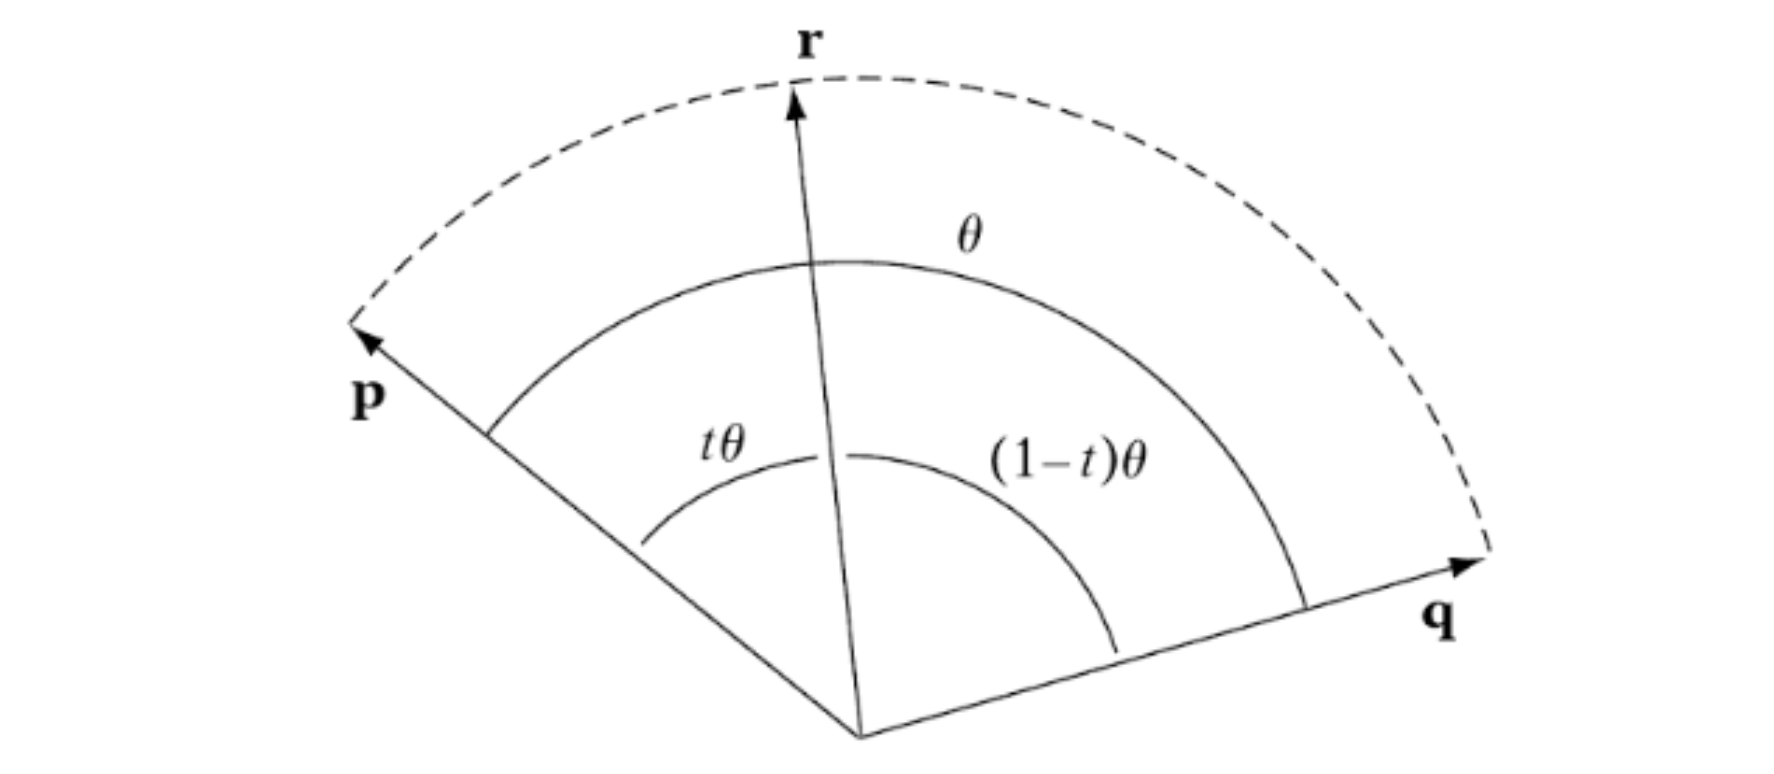

In [13]:
from PIL import Image
display(Image.open("../resources/Slerp.png"))

如图所示，$\vec{r}$将$\vec{p}, \vec{q}$的角度进行等分，球面线性插值公式为

$$\vec{r} = \frac{sin(t\theta)}{sin(\theta)}\vec{q} + \frac{sin((1 - t)\theta)}{sin(\theta)}\vec{p}$$

另外在插值前需保证四元数$\vec{p}, \vec{q}$之间的夹角是锐角($dot(\vec{p}, \vec{q}) > 0$)，否则需将一个四元数乘以-1(表示的仍是**同一个旋转操作**)。